### Logistic Regression Implementation

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
X,Y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [5]:
logistic = LogisticRegression()

In [6]:
logistic.fit(X_train,Y_train)

LogisticRegression()

In [7]:
Y_pred = logistic.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [8]:
logistic.predict_proba(X_test)

array([[7.74477909e-01, 2.25522091e-01],
       [3.36684957e-02, 9.66331504e-01],
       [6.70682154e-01, 3.29317846e-01],
       [7.98668032e-02, 9.20133197e-01],
       [9.76616650e-01, 2.33833501e-02],
       [4.13572804e-02, 9.58642720e-01],
       [9.79028767e-01, 2.09712329e-02],
       [9.59367261e-01, 4.06327393e-02],
       [8.08520049e-01, 1.91479951e-01],
       [6.84954318e-01, 3.15045682e-01],
       [9.13669448e-01, 8.63305524e-02],
       [2.63597018e-01, 7.36402982e-01],
       [5.25844192e-01, 4.74155808e-01],
       [2.11912354e-01, 7.88087646e-01],
       [7.93592056e-01, 2.06407944e-01],
       [9.46621678e-01, 5.33783219e-02],
       [2.62957933e-02, 9.73704207e-01],
       [3.24212617e-01, 6.75787383e-01],
       [3.14803584e-01, 6.85196416e-01],
       [2.04956217e-01, 7.95043783e-01],
       [5.04587065e-01, 4.95412935e-01],
       [9.66703630e-01, 3.32963696e-02],
       [2.00514796e-01, 7.99485204e-01],
       [7.77891908e-01, 2.22108092e-01],
       [8.729863

In [9]:
accuracy_score(Y_test,Y_pred)

0.8466666666666667

In [10]:
confusion_matrix(Y_test,Y_pred)

array([[118,  17],
       [ 29, 136]])

In [11]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### Hyperparameter Tuning and Cross-Validation

In [12]:
model = LogisticRegression()
penalty = ["l1", "l2", "elasticnet"]
c_values = [100,10,1,0.1,0.01]
solver = ["newton-cg", "lbfgs","liblinear","sag","saga"]


In [13]:
params = dict(penalty=penalty, C= c_values, solver=solver)

In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
cv = StratifiedKFold(n_splits=5)

In [25]:
grid = GridSearchCV(estimator=model,param_grid=params,scoring="accuracy", cv=cv, n_jobs=-1)

In [26]:
grid.fit(X_train,Y_train)

c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\I

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [27]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [28]:
grid.best_score_

np.float64(0.8785714285714287)

In [30]:
y_pred = grid.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [31]:
accuracy_score(Y_test, y_pred)

0.8533333333333334

In [33]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



### Randomized Search CV

In [35]:
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring="accuracy")

In [36]:
randomcv.fit(X_train, Y_train)

c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\IP F

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [37]:
randomcv.best_score_

np.float64(0.8771428571428572)

In [38]:
randomcv.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 0.01}

In [39]:
accuracy_score(Y_test, randomcv.predict(X_test))

0.8533333333333334

In [42]:
print(classification_report(Y_test, randomcv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



### Logistic Regression for Multiclass Classification

In [44]:
X,Y = make_classification(n_samples=1000, n_features=10, n_classes=3,n_informative=3 ,random_state=42)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [46]:
logistic = LogisticRegression(multi_class="ovr")

In [47]:
logistic.fit(X_train,Y_train)

c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [49]:
Y_pred = logistic.predict(X_test)

In [51]:
accuracy_score(Y_pred,Y_test)

0.68

In [52]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       113
           1       0.40      0.58      0.47        65
           2       0.86      0.71      0.78       122

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.72      0.68      0.70       300



### Logistic Regression for Imbalanced Dataset

In [53]:
from collections import Counter
from sklearn.datasets import make_classification

In [54]:
X,Y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, n_redundant=0, 
                          weights=[0.99],random_state=42)

In [55]:
X

array([[ 1.0735459 , -1.10133925],
       [ 0.75594526, -1.1723519 ],
       [ 1.35447877, -0.94852841],
       ...,
       [-2.15090138, -2.98937226],
       [ 2.45164689, -0.1566294 ],
       [ 3.64147835,  0.75692519]])

In [56]:
Counter(Y)

Counter({np.int64(0): 985, np.int64(1): 15})

<Axes: xlabel='X0', ylabel='X1'>

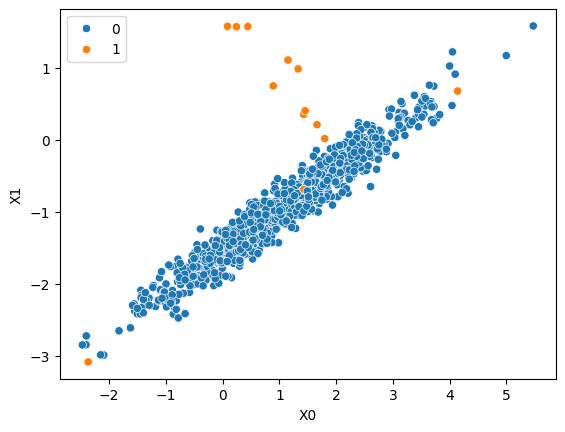

In [64]:
# Convert X to a DataFrame with named columns for readability
df = pd.DataFrame(X, columns=["X0", "X1"])

# Plot using seaborn's scatterplot with keyword arguments for x and y
sns.scatterplot(x="X0", y="X1", hue=Y, data=df)


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [67]:
model = LogisticRegression()
penalty = ["l1", "l2", "elasticnet"]
c_values = [100,10,1,0.1,0.01]
solver = ["newton-cg", "lbfgs","liblinear","sag","saga"]
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [68]:
params = dict(penalty=penalty, C= c_values, solver=solver, class_weight=class_weight)

In [69]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [71]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params,scoring="accuracy", cv=cv)

In [ ]:
grid.fit(X_train,Y_train)


c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\IP FLEX5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached w

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       247\n           1       1.00      0.67      0.80         3\n\n    accuracy                           1.00       250\n   macro avg       1.00      0.83      0.90       250\nweighted avg       1.00      1.00      1.00       250\n'

In [73]:
accuracy_score(Y_test, grid.predict(X_test))

0.996

In [74]:
print(classification_report(Y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      0.67      0.80         3

    accuracy                           1.00       250
   macro avg       1.00      0.83      0.90       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
#Library to import to remove the warnings

### Logistic Regression ROC

In [75]:
X,Y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [78]:
dummy_model_prob = [ 0 for i in range(len(Y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [79]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [83]:
model_prob = model.predict_proba(X_test)
#Let's focus on the postive outcome
model_prob = model_prob[:,1]

In [84]:
model_prob

array([9.18276259e-01, 8.86655741e-01, 2.31674481e-02, 9.81890609e-01,
       9.54531321e-01, 7.96750718e-01, 6.83734407e-03, 5.40239126e-02,
       9.91309712e-01, 4.08601349e-01, 1.49259319e-02, 9.17071835e-01,
       8.62533505e-01, 9.94793022e-01, 3.99364247e-02, 4.93114672e-02,
       9.78960644e-01, 1.69759741e-01, 3.71812822e-02, 9.67821937e-01,
       3.91441895e-03, 8.85954355e-01, 8.19647194e-01, 5.69585444e-01,
       5.88408407e-01, 9.73099363e-01, 9.65994342e-01, 2.73877518e-03,
       8.01595231e-01, 1.39002986e-01, 3.52089123e-02, 2.85090339e-01,
       8.10370535e-01, 1.02046853e-01, 9.00968269e-01, 1.04921781e-01,
       6.87638127e-03, 9.69967236e-02, 3.08984187e-02, 7.44365926e-01,
       5.29696559e-02, 1.45061252e-02, 4.47168571e-01, 6.62185322e-01,
       9.42074010e-01, 9.99408591e-01, 9.66013718e-01, 3.60317284e-01,
       1.43606468e-01, 1.42698355e-01, 5.19022312e-01, 6.34300275e-02,
       9.15522435e-01, 8.15943076e-01, 6.17835757e-01, 7.87717087e-02,
      

In [89]:
from sklearn.metrics import roc_auc_score, roc_curve
dummy_model_auc = roc_auc_score(Y_test, dummy_model_prob)
model_auc = roc_auc_score(Y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [93]:
#TPR in the y-axis
#FPR in the x-axis

In [96]:
#Calculating ROC curves
dummy_fpr, dummy_tpr, _ = roc_curve(Y_test, dummy_model_prob)
model_fpr, model_tpr, threshold= roc_curve(Y_test, model_prob)


Text(0, 0.5, 'TPR')

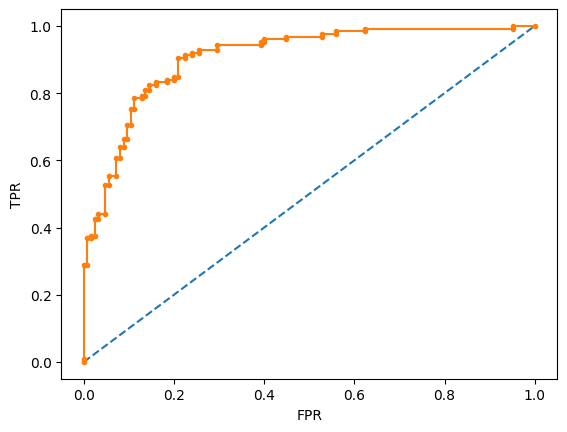

In [97]:
plt.plot(dummy_fpr, dummy_tpr, linestyle = "--", label = "Dummy Model")
plt.plot(model_fpr, model_tpr, marker = ".", label = "Logistic")

plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0, 0.5, 'TPR')

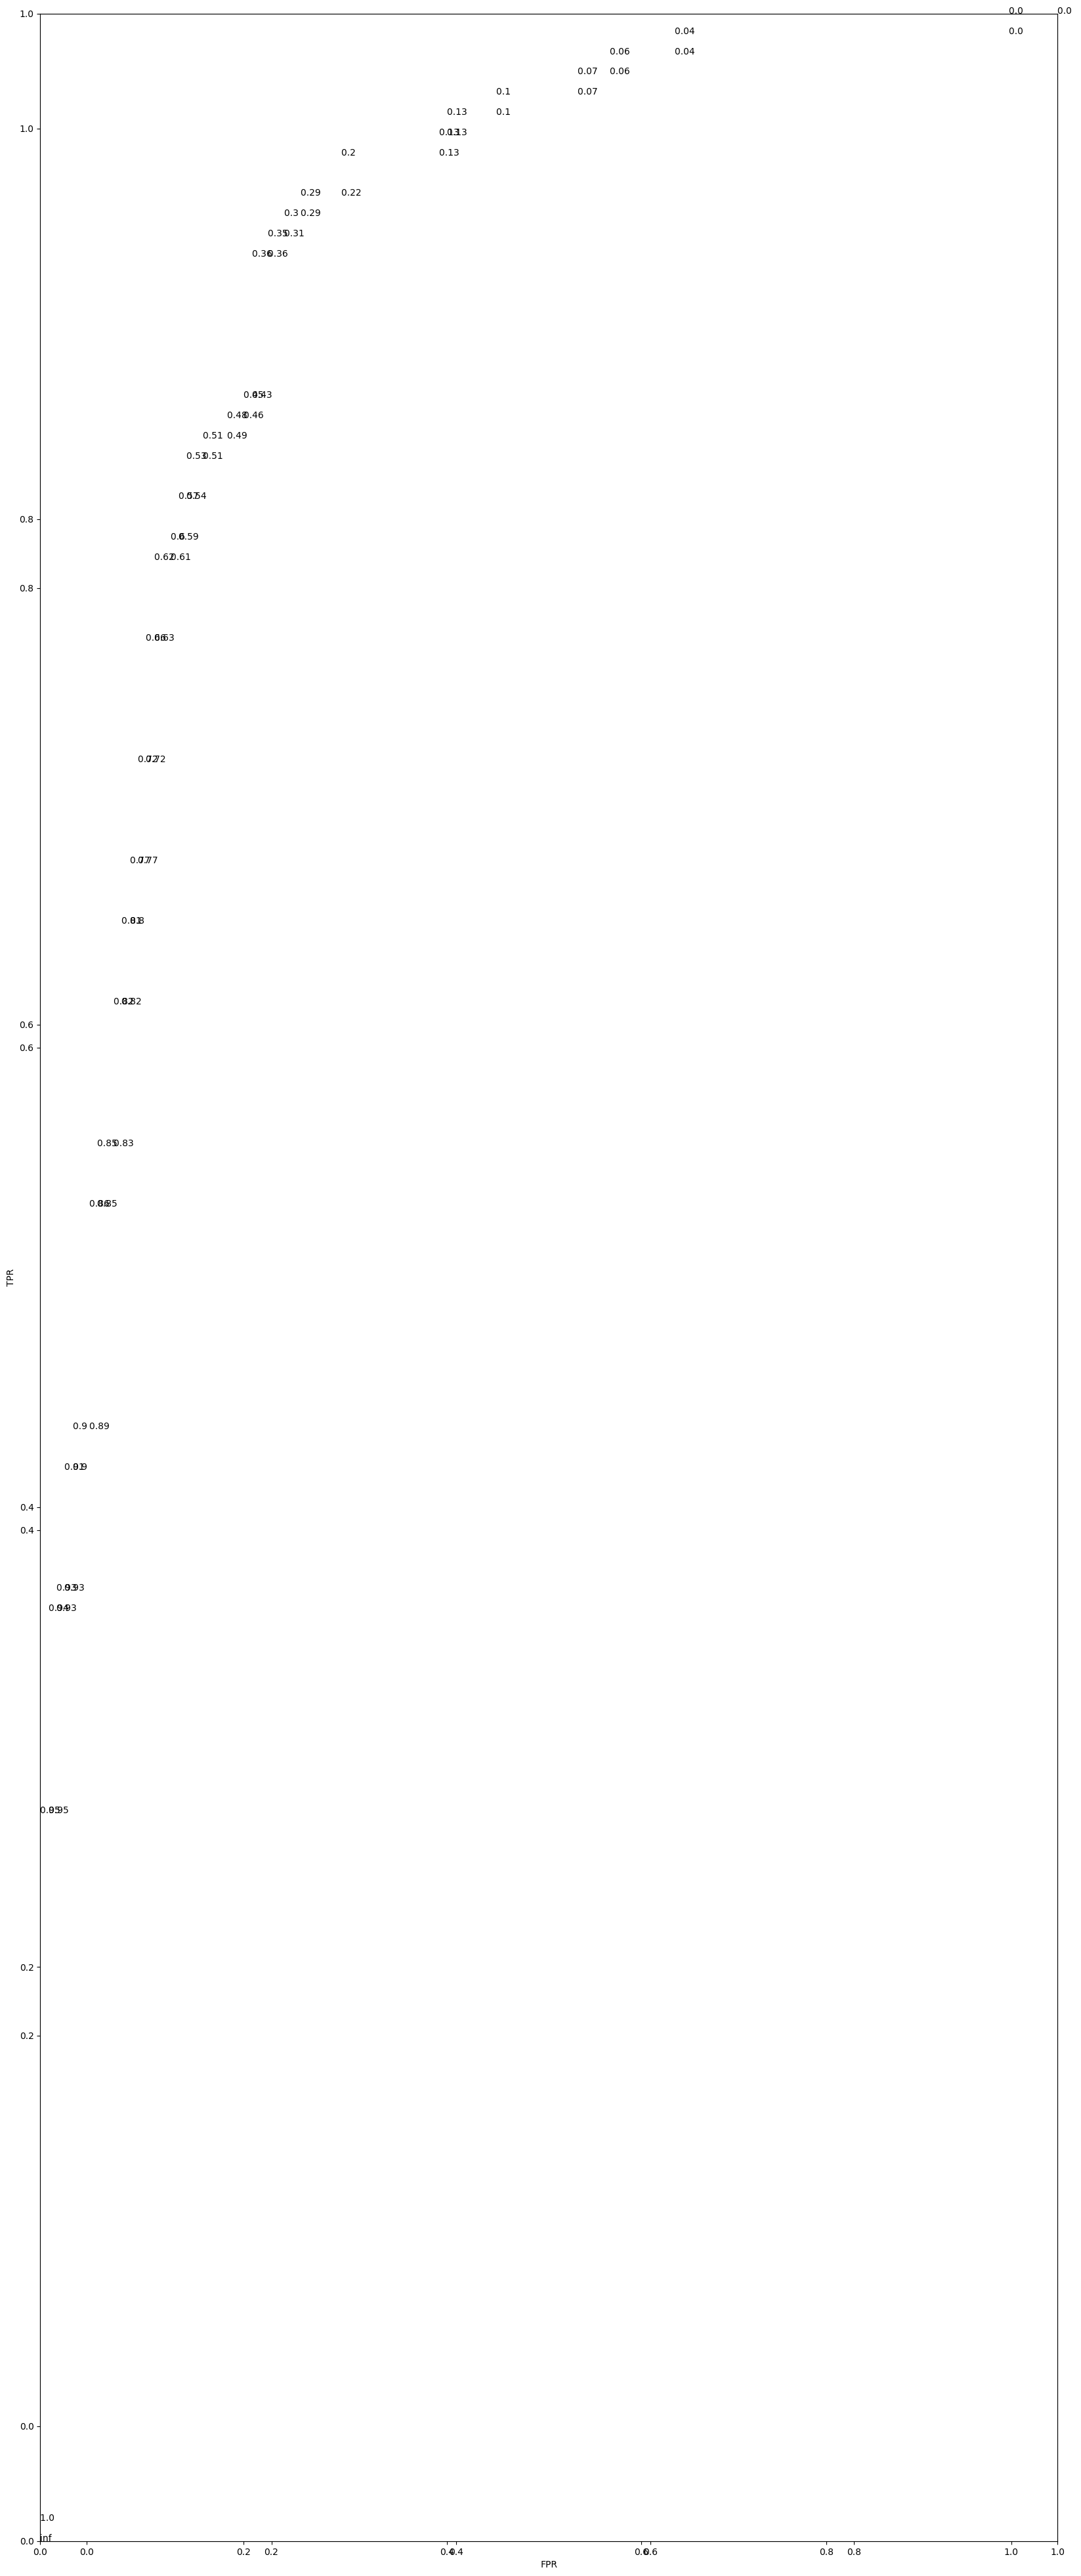

In [100]:
fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr, dummy_tpr, linestyle = "--", label = "Dummy Model")
plt.plot(model_fpr, model_tpr, marker = ".", label = "Logistic")
ax = fig.add_subplot(111)

for xyz in zip(model_fpr, model_tpr, threshold):
    ax.annotate('%s ' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
plt.xlabel("FPR")
plt.ylabel("TPR")